In [231]:
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score
from sklearn.model_selection import train_test_split


In [232]:
df = pd.read_csv('calories.csv')
print(df.columns)
print(df.head(5))
print(df.info())
print("Avg. calories consumption",df['Calories'].mean())

Index(['User_ID', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Gender', 'Calories'],
      dtype='object')
    User_ID  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Gender  \
0  14498311   79     165      73        13          79       40.0    male   
1  16700865   28     148      48         6          91       39.4  female   
2  17197650   27     187      82        25         101       40.8    male   
3  16400540   40     173      71        16          93       40.4    male   
4  15539631   40     183      90         5          80       39.0    male   

   Calories  
0        54  
1        28  
2       128  
3        69  
4        14  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     9000 non-null   int64  
 1   Age         9000 non-null   int64  
 2   Height      9000 non-null   int64  
 3   W

In [233]:
X = df[['Age','Height','Weight','Duration','Heart_Rate' , 'Body_Temp']]
Y = df[['Calories']]
lr = LinearRegression()
lr.fit(X,Y)
yhat = lr.predict(X)
# print(yhat)

R2 = r2_score( Y,yhat )
print("R^2 : " ,R2)#96.7% -nice



R^2 :  0.9670016084538713


In [234]:
x_train , x_test, y_train , y_test = train_test_split(X,Y,test_size=0.2 ,random_state=1)


In [235]:
sample = len(df)
no_males = len(df[df['Gender'] == 'male'])
avg_duration = float(df['Duration'].mean())
oldSeniorUsers = len(df[df['Age'] >= 75])

answers = [
    str(sample),
    str(no_males),
    f"{avg_duration:.2f}",
    str(oldSeniorUsers)
]
task1_df = pd.DataFrame({
    'subtaskID': [1, 2, 3,4],
    'datapointID': [1, 1, 1,1],
    # 'answer': [sample, no_males, avg_duration,oldSeniorUsers]
    'answer':answers
})
task1_df.to_csv('output.csv', index=False)

In [236]:
test_df = pd.read_csv('calories_test.csv')

task5df = test_df[test_df['Subtask']==5]
x_pred = task5df[['Age','Height','Weight','Duration','Heart_Rate' , 'Body_Temp']]

yhat2 = lr.predict(x_pred).flatten()

submission_df = pd.DataFrame({
     'subtaskID': 5,
    'datapointID': task5df['User_ID'],
    'answer': yhat2
})
submission_df.to_csv('output.csv', index=False , mode='a' ,header=False )



In [237]:
#subtask 6

test_df2 = pd.read_csv('calories_test.csv')

task6df = test_df2[test_df2['Subtask']==6]
x_pred2 = task6df[['Age','Height','Weight','Duration','Heart_Rate' , 'Body_Temp']]

yhat3 = lr.predict(x_pred2).flatten()

submission_df2 = pd.DataFrame({
     'subtaskID': 6,
    'datapointID': task6df['User_ID'],
    'answer': yhat3
})
submission_df2.to_csv('output.csv', index=False,mode='a', header=False)


<Axes: xlabel='Weight', ylabel='Calories'>

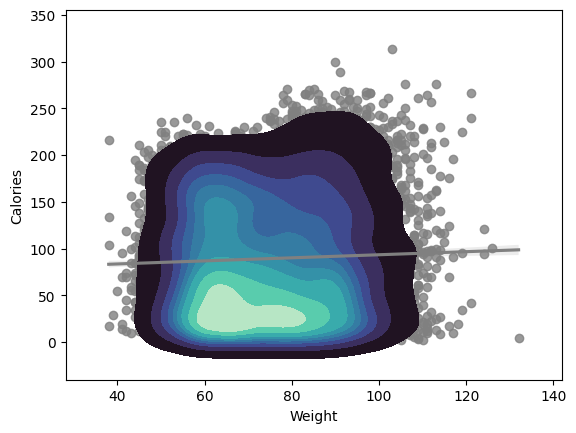

In [264]:
#visualization
sns.regplot(x=df['Weight'],y=Y , data = df,color='grey')
sns.kdeplot(data=df, x='Weight', y='Calories', fill=True, cmap='mako', thresh=0.05)
